<a href="https://colab.research.google.com/github/LeonardoBrunoMorais/MVP-Sprint-II/blob/main/Sprint_II_MVP_OSCAR_Parte_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Sprint II - Machine Learning & Analytics - Parte A

## Leonardo Bruno de Morais

### MVP de Previsão do Ganhadores do OSCAR com base nas avaliações dos filmes.

## 1. Definição do Problema







Os datasets utilizados neste projeto serão o **IMDb**, proveniente originalmente dos dados extraídos do **Kaggle** e disponível no dataset de **Kurt Nakasato**. Foram utilizados os dados de pré-processamento (antes de qualquer tratamento) disponíveis no site: https://www.kaggle.com/datasets/kurtnakasato/imdb-100000-moviestvshows?resource=download.

Além do DataSet **OSCAR** de Raphael Fontes de pré-processamento (antes de qualquer tratamento) disponílvel no site: https://www.kaggle.com/datasets/unanimad/the-oscar-award.

O objetivo desse projeto é prever o ganhador de uma categoria do OSCAR com base no número de visualizações (avaliações).  Esses datasets contém os dados do IMDB 100.000+ Filmes/Programas de TV com cerca de 72.910 filmes que tiveram pelo menos 100 votos e a preimiação do OSCAR de 1927 a 2023.

Como um modelo de aprendizado supervisionado, o datasets apresentam diversos atributos relacionados a votação e notas dos filmes na plataforma. Iremos considerar a variável Vencedor (winner) como uma variável classificatória **(true: 1, false: 0)**. As variáveis ​​preditoras incluem a aprovação dos filmes, considerando o somatório do número de visualizações de acordo com a avaliação dos usuários das plataforma.

Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/kurtnakasato/imdb-100000-moviestvshows?resource=download

https://www.kaggle.com/datasets/unanimad/the-oscar-award



**Informações sobre os atributos do IMDb:**

**IMDb Filmes**

1. **dataId** - Chave primária
2. **contentType** - Tipo de conteúdo - Filme ou TvShow
3. **title** - Título do Conteúdo
4. **length** - Duração do conteúdo em minutos
5. **releaseYear** - Ano do lançamento
6. **endYear** - Fim de ano se programa de TV
7. **votes** - Quantidade de pessoas que deixaram uma classificação
8. **rating** - A classificação média
9. **gross** - Ganho bruto
10. **certificate** - Classificação do certificado
11. **description** - Descrição resumido do Filme ou TvShow

**IMDb Genêro**

1. **dataId** - Chave primária
2. **genre** - Gênero listado no IMDb

**IMDb Região**

1. **dataId** - Chave primária
2. **region** - Regiões listadas no IMDb

**Informações sobre os atributos do OSCAR:**
1. **year_film** - Filme exibido no ano
2. **year_ceremony** - Cerimônia aconteceu no ano
3. **ceremony** - Número de cerimônias
4. **category** - Nomeação ou indicação corrente
5. **name** - Nome da nomeação ou indicação
6. **film** - Título do filme
7. **winner** - Verdadeiro se vencedor (true: 1, false: 0)

## 2. Carga de Dados

Importação dos pacotes que iremos utilizar no projeto.

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar os arquivos .csv disponíveis online.

In [1]:
# importações
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Iremos importar as urls dos arquivos csv....

In [3]:

# Carrega arquivo csv usando Pandas

# Informa a URL de importação do dataset IMDB Filmes
Url1 = 'https://raw.githubusercontent.com/LeonardoBrunoMorais/FILMES_OSCAR/main/contentDataPrime.csv'

# Informa a URL de importação do dataset IMDB Generos
Url2 = 'https://raw.githubusercontent.com/LeonardoBrunoMorais/FILMES_OSCAR/main/contentDataGenre.csv'

# Informa a URL de importação do dataset IMDB Regiões
Url3 = 'https://raw.githubusercontent.com/LeonardoBrunoMorais/FILMES_OSCAR/main/contentDataRegion.csv'

# Informa a URL de importação do dataset Oscar
Url4 = 'https://raw.githubusercontent.com/LeonardoBrunoMorais/FILMES_OSCAR/main/the_oscar_award.csv'


# Lê o arquivo utilizando as colunas informadas
dfIMDB_Filmes = pd.read_csv(Url1, delimiter=',')
dfIMDB_Generos = pd.read_csv(Url2, delimiter=',')
dfIMDB_Regioes = pd.read_csv(Url3, delimiter=',')
df_Oscar = pd.read_csv(Url4, delimiter=',')


# Verificando as colunas disponíveis no dataset
print('Dataset IMDB Filmes:\n')
dfIMDB_Filmes.info()
print('\nDataset IMDB Gêneros:\n')
dfIMDB_Generos.info()
print('\nDataset IMDB Regiões:\n')
dfIMDB_Regioes.info()
print('\nDataset Oscar:\n')
df_Oscar.info()

Dataset IMDB Filmes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101606 entries, 0 to 101605
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dataId       101606 non-null  int64  
 1   contentType  101606 non-null  object 
 2   title        101606 non-null  object 
 3   length       101606 non-null  object 
 4   releaseYear  101606 non-null  int64  
 5   endYear      101606 non-null  int64  
 6   votes        101606 non-null  int64  
 7   rating       101606 non-null  float64
 8   gross        101606 non-null  int64  
 9   certificate  58358 non-null   object 
 10  description  101606 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.5+ MB

Dataset IMDB Gêneros:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219213 entries, 0 to 219212
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   dataId  219213 non-null  int64 
 

### **2.1 Agrupamento dos datasets IMDB**

Vamos agrupar os datasets IMDb Filmes, IMDb Gêneros e IMDb Regiões utilizando a coluna dataId.

In [4]:
# Mesclando as informações dos datasets IMDB Filmes, IMDB Gêneros e IMDB Regiões
df_IMDB = pd.merge(dfIMDB_Filmes, dfIMDB_Generos.drop_duplicates(['dataId']), on=['dataId'], how='left')
df_IMDB = pd.merge(df_IMDB, dfIMDB_Regioes.drop_duplicates(['dataId']), on=['dataId'], how='left')

# Verificando as informações do dataset
df_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101606 entries, 0 to 101605
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dataId       101606 non-null  int64  
 1   contentType  101606 non-null  object 
 2   title        101606 non-null  object 
 3   length       101606 non-null  object 
 4   releaseYear  101606 non-null  int64  
 5   endYear      101606 non-null  int64  
 6   votes        101606 non-null  int64  
 7   rating       101606 non-null  float64
 8   gross        101606 non-null  int64  
 9   certificate  58358 non-null   object 
 10  description  101606 non-null  object 
 11  genre        101606 non-null  object 
 12  region       101606 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 10.9+ MB


### **2.1 Agrupamento dos datasets IMDB e Oscar**

Vamos levar algumas informações do dataset df_IMDB para o dataset DF_Oscar. Mas antes iremos classificar os dois datasets pelo ano de lançamento do filme.

In [5]:
# Classificando pelo ano
df_IMDB = df_IMDB.sort_values(['endYear', 'endYear'])
df_Oscar = df_Oscar.sort_values(['year_film', 'year_film'])

# Renomeando a Coluna title para film
df_IMDB = df_IMDB.rename(columns={'title': 'film'})

# Mesclando as informações dos datasets df_IMDB e df_Oscar
df_Oscar_IMDB = pd.merge(df_Oscar, df_IMDB.drop_duplicates(['film']), on=['film'], how='left')

# Verificando as informações do dataset
df_Oscar_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10765 entries, 0 to 10764
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year_film      10765 non-null  int64  
 1   year_ceremony  10765 non-null  int64  
 2   ceremony       10765 non-null  int64  
 3   category       10765 non-null  object 
 4   name           10761 non-null  object 
 5   film           10450 non-null  object 
 6   winner         10765 non-null  bool   
 7   dataId         8841 non-null   float64
 8   contentType    8841 non-null   object 
 9   length         8841 non-null   object 
 10  releaseYear    8841 non-null   float64
 11  endYear        8841 non-null   float64
 12  votes          8841 non-null   float64
 13  rating         8841 non-null   float64
 14  gross          8841 non-null   float64
 15  certificate    8389 non-null   object 
 16  description    8841 non-null   object 
 17  genre          8841 non-null   object 
 18  region

Selecionando as colunas

In [6]:
# Selecionando as colunas que queremos manter no dataset df_IMDB
df_Oscar_IMDB = df_Oscar_IMDB [['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film', 'winner', 'votes', 'rating', 'genre', 'region' ]]

#Exibindo o dataset
display(df_Oscar_IMDB)

,year_film,year_ceremony,ceremony,category,name,film,winner,votes,rating,genre,region
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False,1128.0,7.7,Drama,Poland
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True,4126.0,8.0,Drama,United States
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False,NaN,NaN,NaN,NaN
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True,26070.0,5.2,Comedy,United States
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False,2743.0,7.2,Drama,United States
...,...,...,...,...,...,...,...,...,...,...,...
10760,2022,2023,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,True,NaN,NaN,NaN,NaN
10761,2022,2023,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",NaN,True,NaN,NaN,NaN,NaN
10762,2022,2023,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",NaN,True,NaN,NaN,NaN,NaN
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,True,NaN,NaN,NaN,NaN


##### **- Criação do Atributo Alvo**

A resposta que queremos do nosso problema é se o filme ganhou o não algum oscar. Vamos alterar a coluna winner para:

True: 1

False: 0

In [7]:
# Alterando a Coluna winner

df_Oscar_IMDB['winner'] = df_Oscar_IMDB['winner'].replace(True, 1)
df_Oscar_IMDB['winner'] = df_Oscar_IMDB['winner'].replace(False, 0)

# Verificano a distribuição do campo Posição
print(df_Oscar_IMDB.groupby('winner').size())

winner
0    8327
1    2438
dtype: int64


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões dos nossos dois datasets, suas informações e alguns exemplos de linhas.

In [8]:
# Mostra as dimensões do dataset
print(df_Oscar_IMDB.shape)

(10765, 11)


In [9]:
# Mostra as informações do datasets
print(df_Oscar_IMDB.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10765 entries, 0 to 10764
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year_film      10765 non-null  int64  
 1   year_ceremony  10765 non-null  int64  
 2   ceremony       10765 non-null  int64  
 3   category       10765 non-null  object 
 4   name           10761 non-null  object 
 5   film           10450 non-null  object 
 6   winner         10765 non-null  int64  
 7   votes          8841 non-null   float64
 8   rating         8841 non-null   float64
 9   genre          8841 non-null   object 
 10  region         8841 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1009.2+ KB
None


In [10]:
# Mostra as 10 primeiras linhas do dataset
df_Oscar_IMDB.head(10)

,year_film,year_ceremony,ceremony,category,name,film,winner,votes,rating,genre,region
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,0,1128.0,7.7,Drama,Poland
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,1,4126.0,8.0,Drama,United States
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,0,NaN,NaN,NaN,NaN
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,1,26070.0,5.2,Comedy,United States
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,0,2743.0,7.2,Drama,United States
5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,0,397.0,2.9,News,Australia
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,1,NaN,NaN,NaN,NaN
7,1927,1928,1,ART DIRECTION,Harry Oliver,7th Heaven,0,26070.0,5.2,Comedy,United States
8,1927,1928,1,CINEMATOGRAPHY,George Barnes,The Devil Dancer;,0,NaN,NaN,NaN,NaN
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,1,397.0,2.9,News,Australia


In [11]:
# Mostra as 10 últimas linhas do dataset
df_Oscar_IMDB.tail(10)

,year_film,year_ceremony,ceremony,category,name,film,winner,votes,rating,genre,region
10755,2022,2023,95,WRITING (Original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,1,381869.0,7.9,Action,United States
10756,2022,2023,95,WRITING (Original Screenplay),Written by Steven Spielberg & Tony Kushner,The Fabelmans,0,75696.0,7.6,Drama,United States
10757,2022,2023,95,WRITING (Original Screenplay),Written by Todd Field,Tár,0,59795.0,7.5,Drama,United States
10758,2022,2023,95,WRITING (Original Screenplay),Written by Ruben Östlund,Triangle of Sadness,0,107723.0,7.4,Comedy,United States
10759,2022,2023,95,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,1,NaN,NaN,NaN,NaN
10760,2022,2023,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,1,NaN,NaN,NaN,NaN
10761,2022,2023,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",NaN,1,NaN,NaN,NaN,NaN
10762,2022,2023,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",NaN,1,NaN,NaN,NaN,NaN
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,1,NaN,NaN,NaN,NaN
10764,2022,2023,95,AWARD OF COMMENDATION,To Ryan Laney for his innovative adaptation an...,Welcome to Chechnya,1,2967.0,7.9,Documentary,United States


In [12]:
# Verificano a distribuição do campo rating
print(df_Oscar_IMDB.groupby('rating').size())

rating
2.8      1
2.9      4
3.3      1
3.7      2
3.8      1
4.0      2
4.1      1
4.2      5
4.3     20
4.4      9
4.5      4
4.6      4
4.7      6
4.8      3
4.9     10
5.0     15
5.1     14
5.2     21
5.3     22
5.4     40
5.5     31
5.6     32
5.7     43
5.8     84
5.9     53
6.0     68
6.1    105
6.2    134
6.3    127
6.4    192
6.5    199
6.6    253
6.7    285
6.8    407
6.9    328
7.0    384
7.1    406
7.2    566
7.3    569
7.4    524
7.5    528
7.6    491
7.7    524
7.8    512
7.9    344
8.0    364
8.1    328
8.2    221
8.3    162
8.4    113
8.5     97
8.6     63
8.7      5
8.8     42
8.9      9
9.0     45
9.2     11
9.3      7
dtype: int64


Vamos exibir um resumo estatístico do dataset ***df_Oscar_IMDB***.

In [13]:
# Faz um resumo estatístico do dataset df_Oscar_IMDB (média, desvio padrão, mínimo, máximo e os quartis)
df_Oscar_IMDB.describe()

,year_film,year_ceremony,ceremony,winner,votes,rating
count,10765.000000,10765.000000,10765.000000,10765.000000,8.841000e+03,8841.000000
mean,1976.074222,1977.074222,49.098932,0.226475,1.689443e+05,7.276394
std,27.055841,27.055841,27.013986,0.418569,3.303675e+05,0.740477
min,1927.000000,1928.000000,1.000000,0.000000,1.100000e+02,2.800000
25%,1952.000000,1953.000000,25.000000,0.000000,4.593000e+03,6.900000
50%,1975.000000,1976.000000,48.000000,0.000000,2.432900e+04,7.300000
75%,2000.000000,2001.000000,73.000000,0.000000,1.752170e+05,7.800000
max,2022.000000,2023.000000,95.000000,1.000000,2.715939e+06,9.300000


### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo do dataset ***df_Oscar_IMDB***. Mas antes vamos converter os campos year-film, year_ceremony e ceremony em campos texto para que eles não sejas considerados como atributos.

In [14]:
# converter as colunas "year_film, year_ceremony e ceremony" para texto para que  não seja considerada uma variável numérica e exibida nos gráficos
df_Oscar_IMDB['year_film'] = df_Oscar_IMDB['year_film'].astype(str)
df_Oscar_IMDB['year_ceremony'] = df_Oscar_IMDB['year_ceremony'].astype(str)
df_Oscar_IMDB['ceremony'] = df_Oscar_IMDB['ceremony'].astype(str)

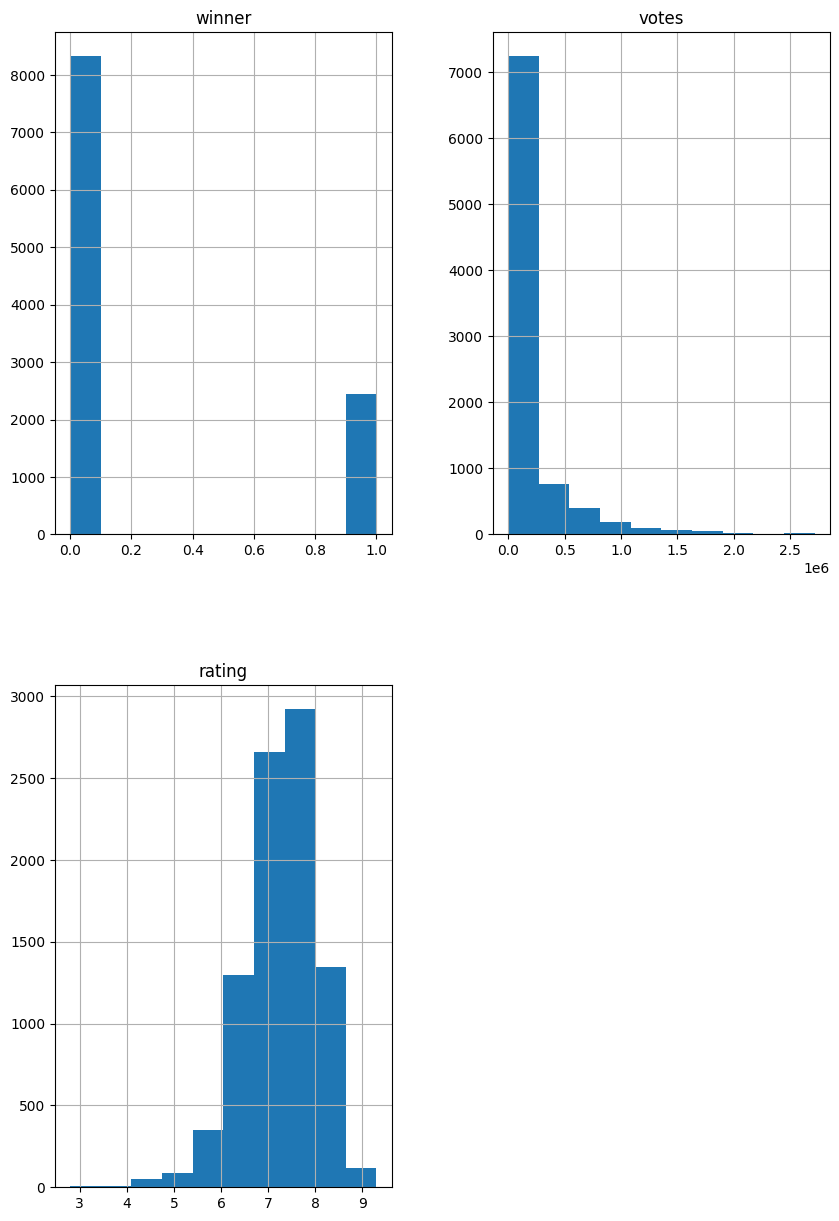

In [15]:
# Histograma
df_Oscar_IMDB.hist(figsize = (10,15))
plt.show()

Podemos verificar que os atributos winner e votes possuem uma distribuição dois picos e despenhadeiro a esquerda, respectivamente. O atributo rating segue uma distribuição assimétrica positiva.



O resultado do gráfio winner tinha uma distribuição esperada, tendo em vista a variável classificatória apresentar apenas dois resultados possíveis, Ganhou (1) ou Não Ganhou (0). Desta forma, a informação apresentada pelo gráfico faz mas sentido em realação a quantidade de ganhadores e não ganhadores de uma categoria de premiação. Ou seja, verifica-se que do universo de 10.765 filmes que concorreram, cerca de 2.438 filmes ganharam alguma premniação versus mais de 8.320 que não ganharam.

Em relação a gráfico rating, percebe-se que a maior concentração de avaliações está entre as notas 7 e 8. Demonstrando que não há grande dispersão entre as avaliações.

A média dos filmes recebeu avalaição de 7,2. Ou seja, cerca de 5.000 filmes. Menos de 500 filmes receberam avalaição até 6,0 e menos de 100, avaliações superiores a 9,0.

Essas informações combinadas com a quantidade de votos sinalizas que há uma relação entre rating e votes que podem indicar alguma covariância.

Agora vamos verificar os dados com o Gráfico de Densidade, ou Density Plot. Vamos criar um density plot para cada atributo do dataset para visualizar a sua curva de densidade.

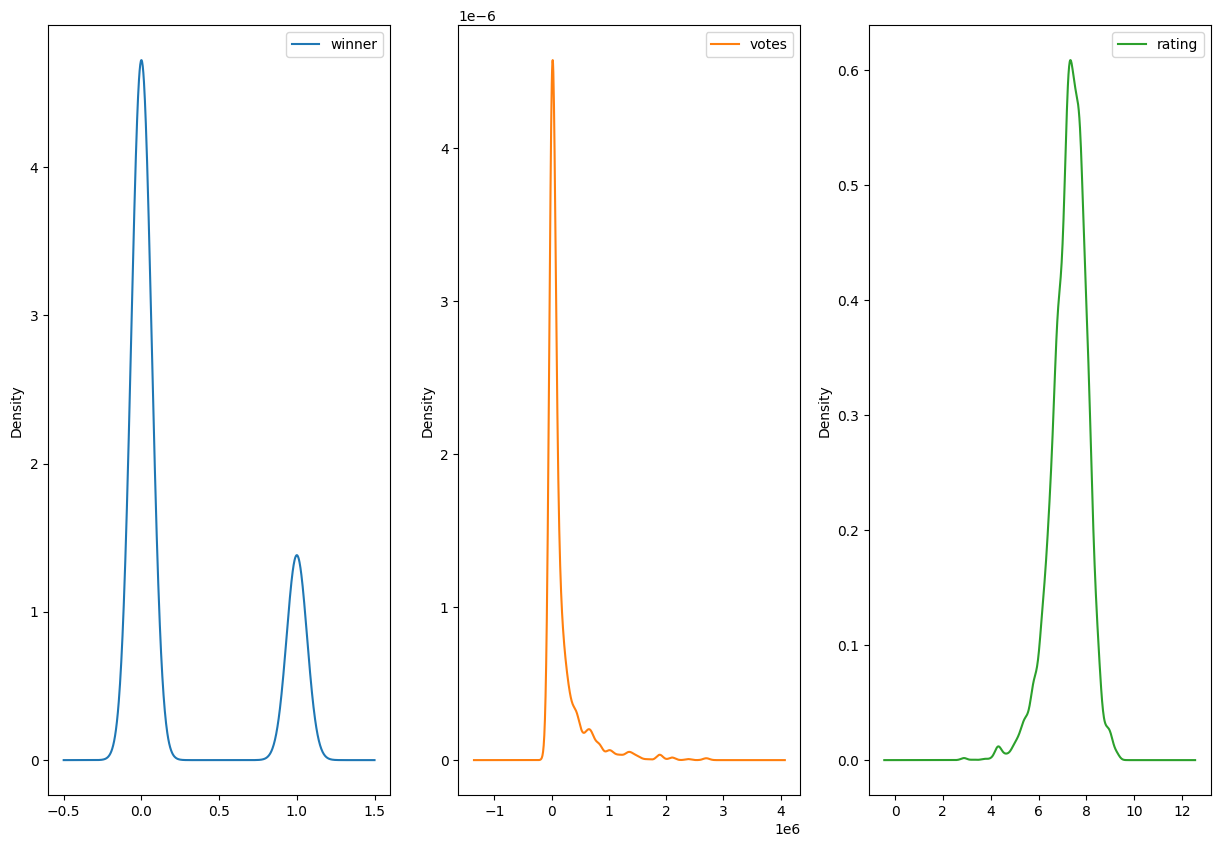

In [16]:
# Density Plot
df_Oscar_IMDB.plot(kind = 'density', subplots = True, layout = (1,3), sharex = False, figsize = (15,10))
plt.show()

A curva de densidade nos mostra uma melhor visualização gráfica dos dados, confirmando nossas análises efetuadas com o histograma.

Vamos agora trabalhar com boxplots.

O objetivo da construção desse gráfico é tornar mais nítida a visualização das estatísticas para fazer análises e processamentos em relação a dispersão, assimetria, média, outliers (mínimos e máximos) e mediana.

No boxplot, a linha no centro (verde) representa o valor da mediana. A linha abaixo é o 1o quartil e a linha acima o terceiro quartil. O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

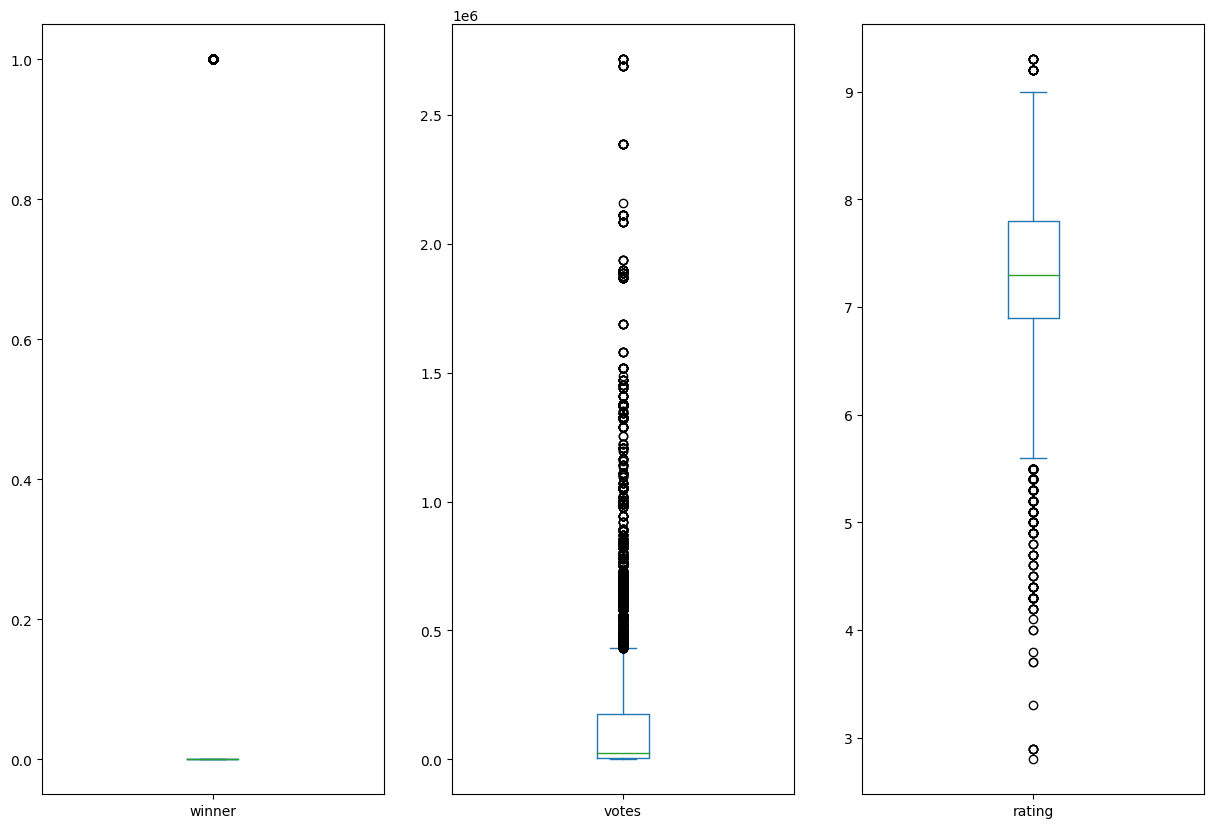

In [17]:
# Boxplot
df_Oscar_IMDB.plot(kind = 'box', subplots = True, layout = (1,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Podemos verificar que a posição winner não gera um quadro central, como já explicado, devido a variável classificatória.

Contudo, em relação ao gráfico votes, uma grande quantidade de valores fora do quadro central, o que indica casos de outliers. Entretanto, não consideramos que esses casos necessitem de tratamentos pois são as pontuações efetivamente avaliadas pelos usurários da plataforma.

Por fim, em relação ao gráfico rating, o quadro central está concetrado entre as avaliações 7 e 8, considerando a sua altura. Ou seja, a diferença entre o primeiro e o terceiro quartil demonstram a variabilidade dos outliers.

Com esse gráfico também podemos ver com mais facilidade a os dois picos (winner), mais acentuado a esqueda no caso do votes e a asssimetria positiva do rating com a mediana mais ao centro do primeiro quarti. São simétricos quando a linha da mediana fica no centro da caixa.

### 3.3. Visualizações Multimodais

Complementaremos a nossa análise de dados verificando a associação entre as nossas variáveis, ou seja, o grau de dependência entre elas. Para isso iremos utilizar o coeficiente de correlação de Pearson(ρ), onde:
* ρ próximo de -1 : há uma correlação negativa entre as variáveis,
* ρ próximo de +1: há uma correlação positiva entre as variáveis,
* ρ próximo de 0: não há correlação entre as variáveis.

Para visualizarmos a matriz de correlação, vamos utilizar a função .heatmap() do pacote seaborn, essa função vai nos retornar uma forma gráfica da matriz com uma escala de cor em conjunto com uma escala numérica, as quais vão indicar o grau medido entre as variáveis.

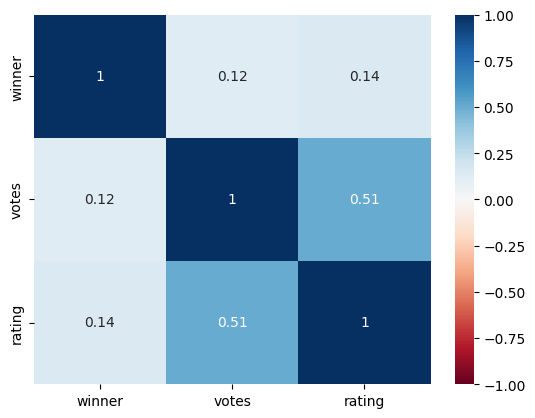

In [18]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(df_Oscar_IMDB.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Nessa matriz podemos ver uma escala de cores de tonalidades de laranja, vermelho e azul, e uma escala numérica que vai de 1 a -1. O interessante dessa representação gráfica é que além da barra lateral que demonstra a escala numérica do coeficiente e das cores, há também em cada quadrante o valor e a cor referente da relação.

Podemos verificar no gráfico que a coluna votes tem uma correlação positiva de 0,51, enquanto a coluna winner tem apenas 0,14.


Por sua vez, o gráfico de dispersão (scatter plot) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

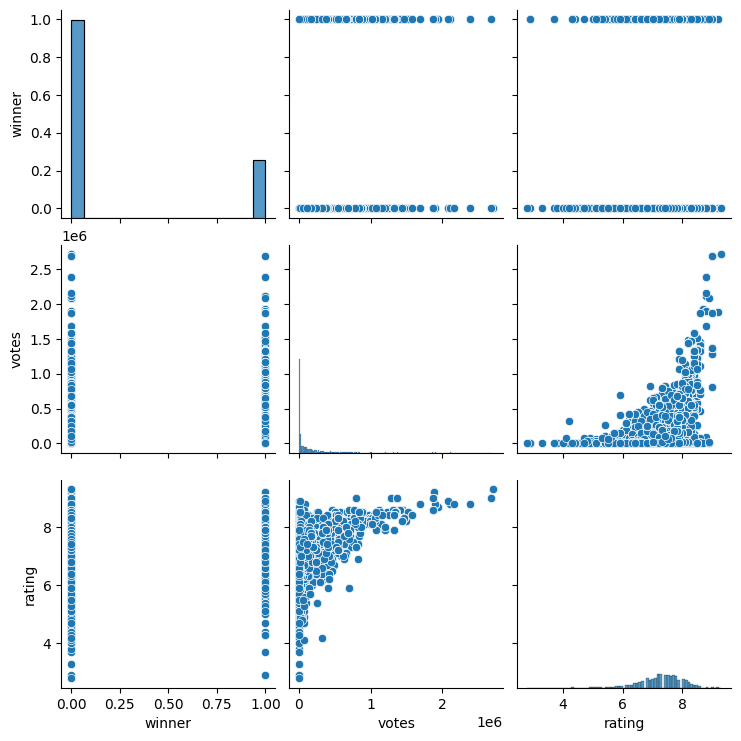

In [19]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(df_Oscar_IMDB)

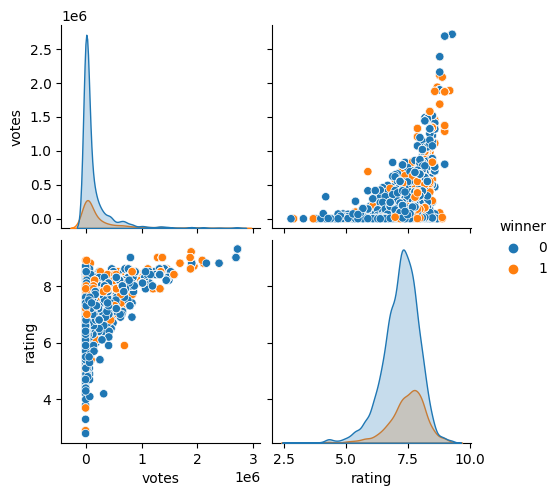

In [20]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(df_Oscar_IMDB, hue = "winner", height = 2.5);

Quando analisamos a relação votes x rating, verificamos que os filmes que ganharam o Oscar (Bolinha lanranja) são os que tiveram a maior quantidade de votos e maior pontuação, ficando na extremidade direita do gráfico. No gráfico rating x votes, fica na extremidade superior do gráfico.


## 4. Pré-Processamento de dados

Nesta etapa iremos realizar o tratamento de valores faltantes (missings) e zerados.

### 4.1. Tratamento de Missings e Limpeza

Primeiramente vamos verificar os valores missing no nosso dataset ***df_Oscar_IMDB***.

#### **4.1.1 Tratamento de NaN**

In [21]:
# verificando nulls no dataset
df_Oscar_IMDB.isnull().sum()

year_film           0
year_ceremony       0
ceremony            0
category            0
name                4
film              315
winner              0
votes            1924
rating           1924
genre            1924
region           1924
dtype: int64

Verificamos que existem 1924 linhas sem rating. Como é com base nessa pontuação que queremos estudar se o filme irá ou não ganhar um oscar, vamos excluir essas linhas sem dados.

#### **4.1.2 Tratamento de zeros**


Vamos salvar uma nova visão de nosso dataset que se chamará agora ***df_OSCAR_NaN***. Nesse dataset iremos selecionar apenas as colunas dos nossos atributos preditores.

In [22]:
# salvando um NOVO dataset para tratamento de missings

# selecionando as colunas
colunas_selecionadas = df_Oscar_IMDB.iloc[:, 4:19]

# criar um novo dataset com as colunas selecionadas que serão as nossas variáveis
df_Oscar_NaN = pd.DataFrame(colunas_selecionadas)

display(df_Oscar_NaN)

,name,film,winner,votes,rating,genre,region
0,Richard Barthelmess,The Noose,0,1128.0,7.7,Drama,Poland
1,Emil Jannings,The Last Command,1,4126.0,8.0,Drama,United States
2,Louise Dresser,A Ship Comes In,0,NaN,NaN,NaN,NaN
3,Janet Gaynor,7th Heaven,1,26070.0,5.2,Comedy,United States
4,Gloria Swanson,Sadie Thompson,0,2743.0,7.2,Drama,United States
...,...,...,...,...,...,...,...
10760,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,1,NaN,NaN,NaN,NaN
10761,"To Diane Warren, for her genius, generosity an...",NaN,1,NaN,NaN,NaN,NaN
10762,"To Peter Weir, a fearless and consummate filmm...",NaN,1,NaN,NaN,NaN,NaN
10763,Iain Neil,NaN,1,NaN,NaN,NaN,NaN


<Axes: >

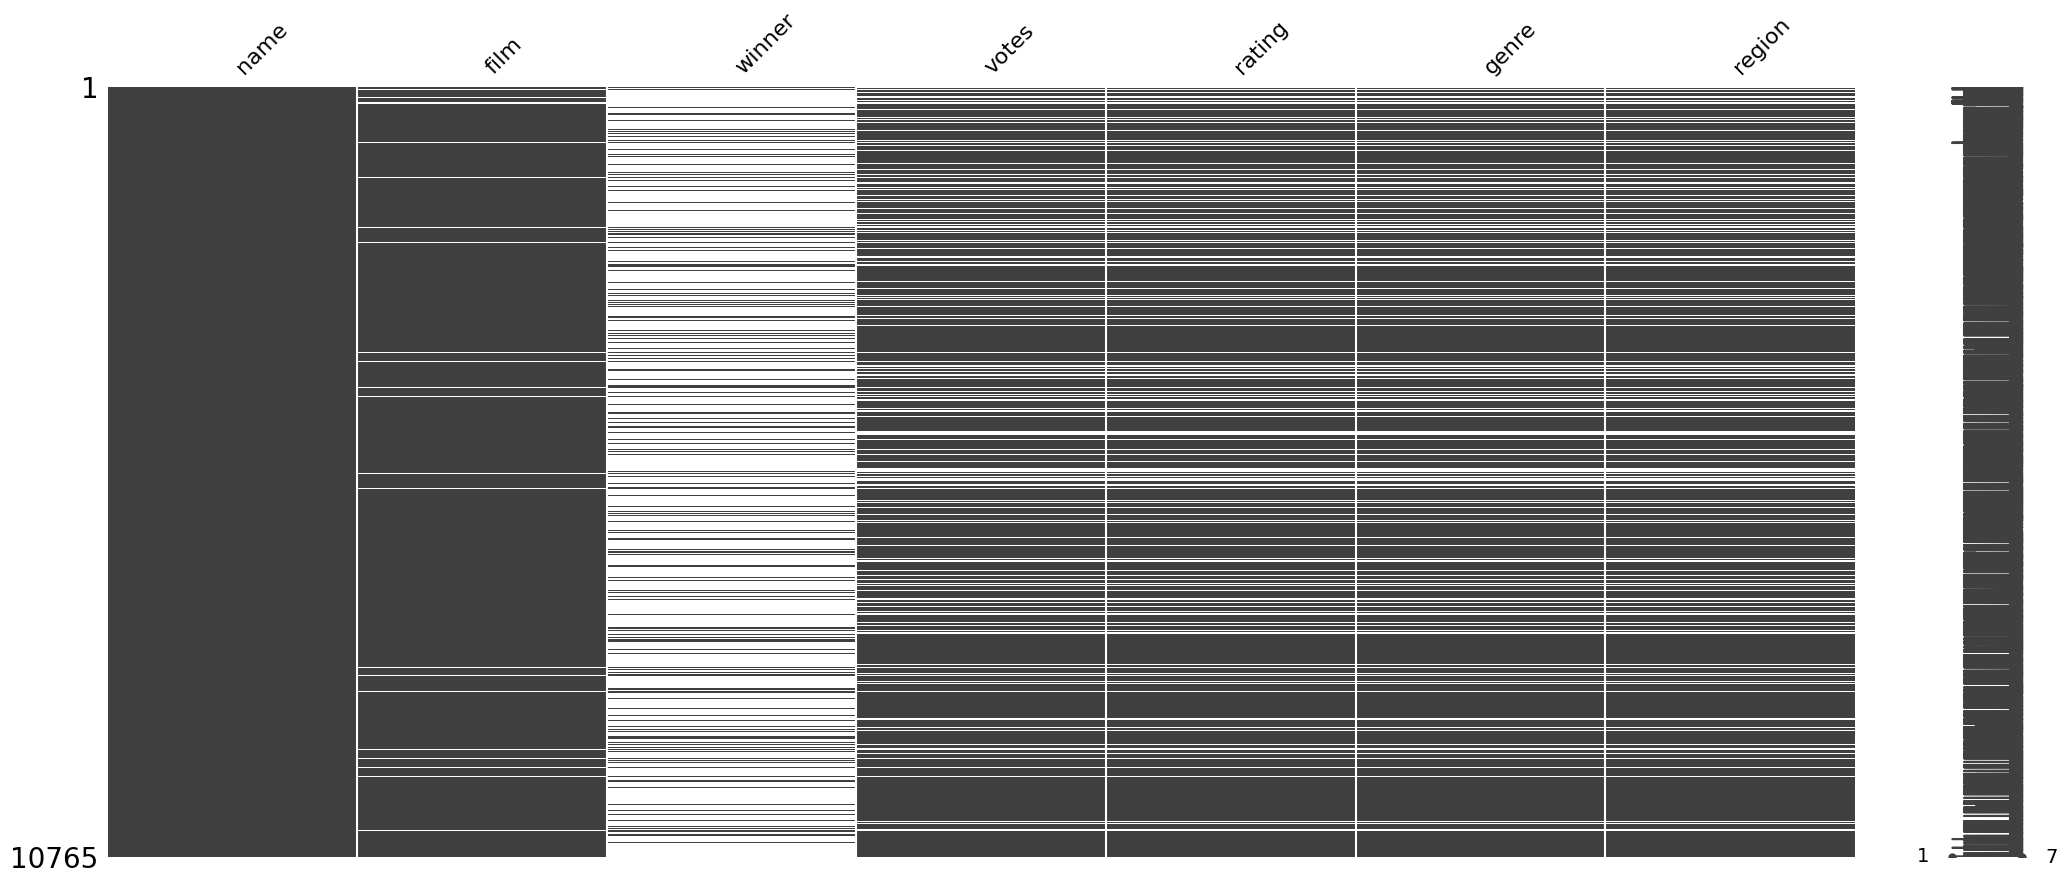

In [23]:
# substituindo os zeros por NaN
df_Oscar_NaN.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_Oscar_NaN)

Foram excluídas todas as linhas em que a pontuação estava zerada.

<Axes: >

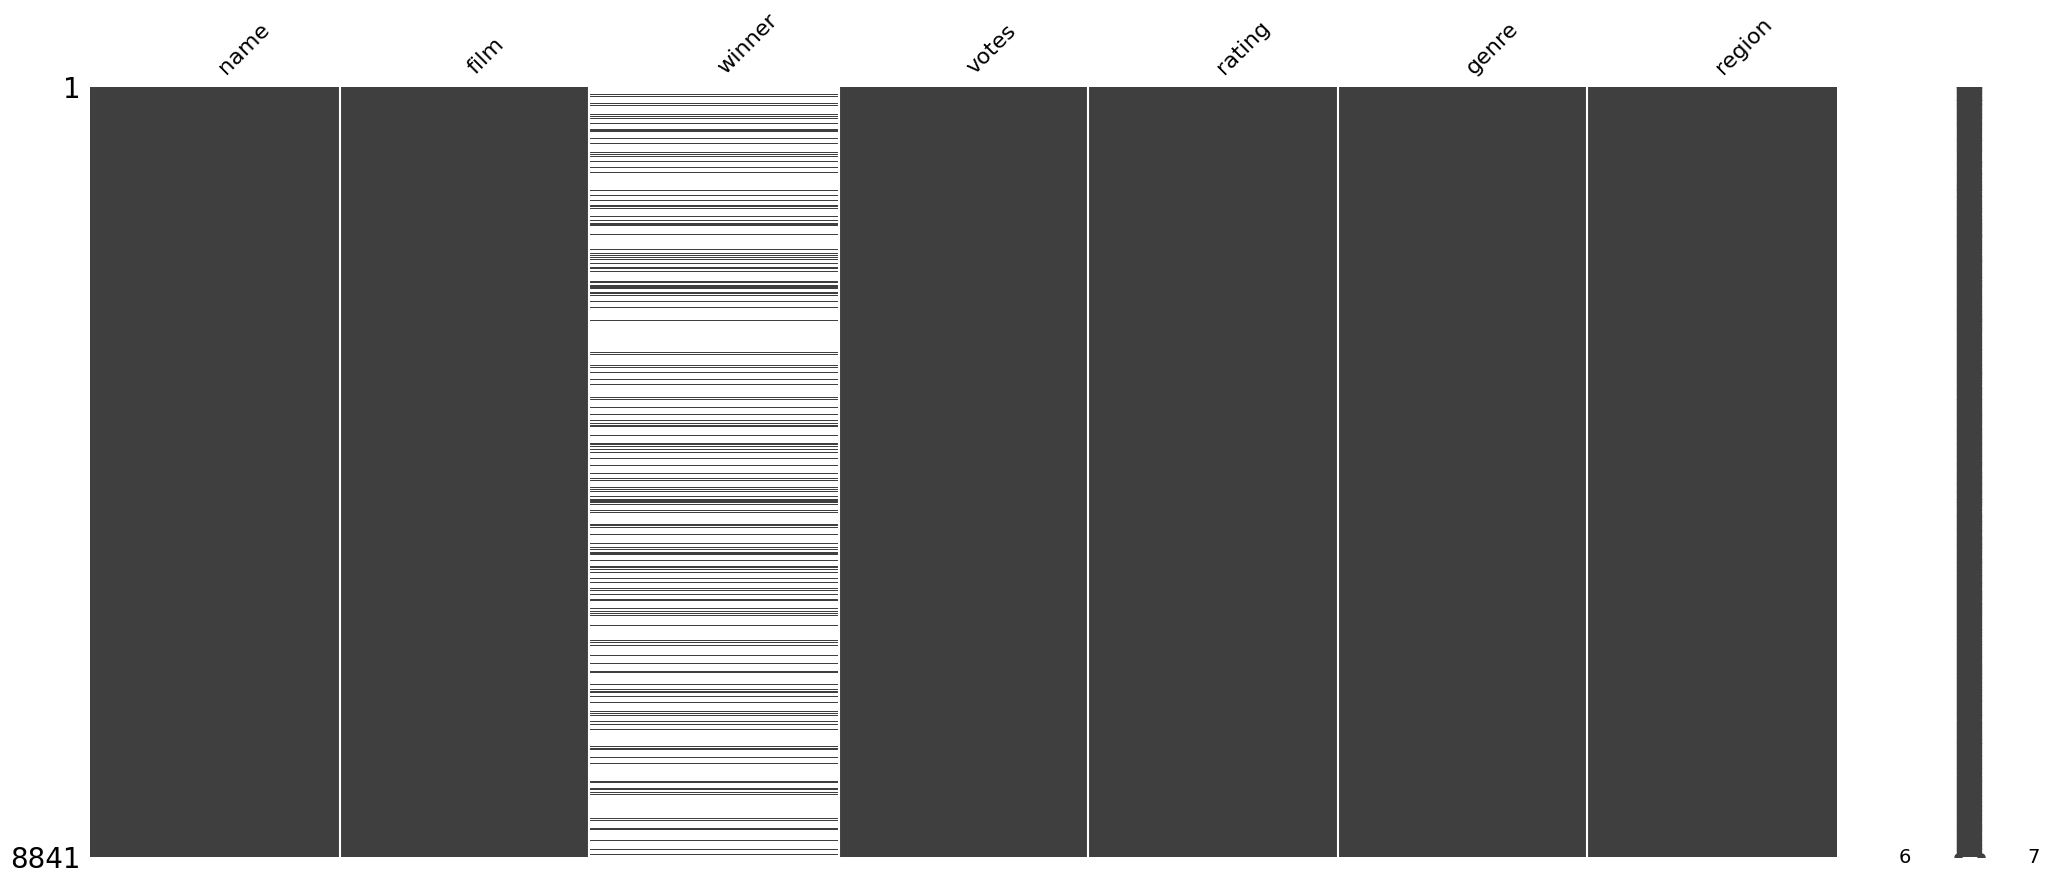

In [24]:
# Excluindo as linhas com NaN

df_Oscar_NaN = df_Oscar_NaN.dropna(subset=['rating'])

# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_Oscar_NaN)

<Axes: >

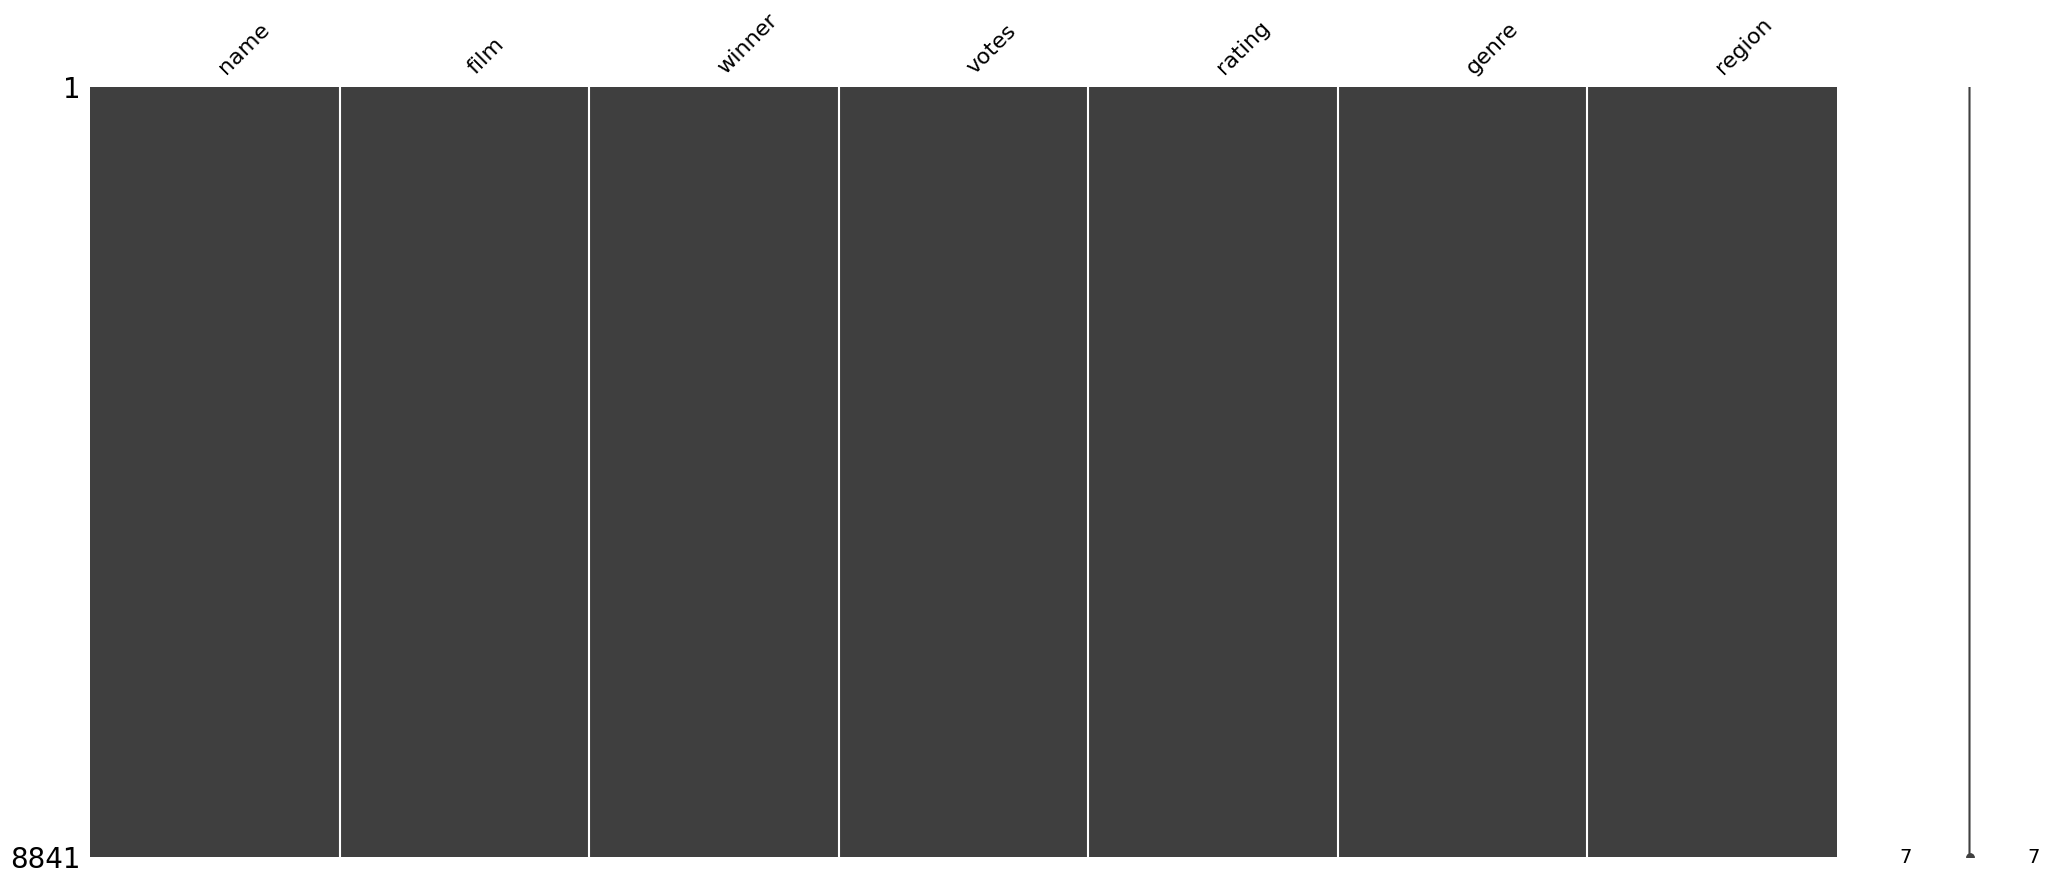

In [25]:
# Substituindo os valores NaN por zero
df_Oscar_NaN = df_Oscar_NaN.fillna(0)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_Oscar_NaN)

In [26]:

# Guardando o novo dataset para testes futuros
df_Oscar_semNan = df_Oscar_NaN

# exibindo as primeiras linhas
df_Oscar_semNan.head()

,name,film,winner,votes,rating,genre,region
0,Richard Barthelmess,The Noose,0.0,1128.0,7.7,Drama,Poland
1,Emil Jannings,The Last Command,1.0,4126.0,8.0,Drama,United States
3,Janet Gaynor,7th Heaven,1.0,26070.0,5.2,Comedy,United States
4,Gloria Swanson,Sadie Thompson,0.0,2743.0,7.2,Drama,United States
5,Rochus Gliese,Sunrise,0.0,397.0,2.9,News,Australia


#### **4.1.3 Transformações numéricas**

Vamos trazer novamente um resumo estatístico de nosso dataset.

In [27]:
# Faz um resumo estatístico do dataset df_Oscar_semNan (média, desvio padrão, mínimo, máximo e os quartis)
df_Oscar_semNan.describe()

,winner,votes,rating
count,8841.000000,8.841000e+03,8841.000000
mean,0.213324,1.689443e+05,7.276394
std,0.409678,3.303675e+05,0.740477
min,0.000000,1.100000e+02,2.800000
25%,0.000000,4.593000e+03,6.900000
50%,0.000000,2.432900e+04,7.300000
75%,0.000000,1.752170e+05,7.800000
max,1.000000,2.715939e+06,9.300000


Quando olhamos a tabela fica mais fácil observar se existe discrepância entre os valores.

A coluna quantidade de votos possui uma granularidade muito maior que a coluna rating. Portanto será necessário aplicar os processos de Normalização e Padronização dos dados.

Mas para isso antes iremos salvar uma cópia de nosso dataset que agora será chamado **df_Oscar_padronizado**.

In [28]:
# Guardando o novo dataset para testes futuros com Padronização
df_Oscar_padronizado = df_Oscar_semNan

A Padronização e a Normalização devem apenas ser aplicadas aos valores dos nossos atributos previsores.

In [29]:
# Separando os valores do dataset em componentes de input (X) e output (Y)
X = df_Oscar_padronizado.values[:,3:5]
Y = df_Oscar_padronizado.values[:,2]

**Padronização**

Se um atributo tem uma variância que tem uma ordem de grandeza maior do que outras, ela pode dominar todo o processo e tornar o projeto incapaz de aprender com outras características corretamente.

Resumindo, o modelo pode colocar mais peso nas variáveis que possuem maior escala e acabar desconsiderando variáveis com menor escala, mas que sejam igualmente ou mais importantes

O objetivo da Padronizaão é colocar todos os nossos recursos em escalas próximas para que o modelo entenda cada um deles como igualmente importantes.




In [30]:
# Padronizando os dados
rescaledX = StandardScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n",df_Oscar_padronizado[['votes', 'rating']].values)
print("\nDados Padronizados (não inclui a coluna winner): \n\n", rescaledX)

Dados Originais: 

 [[1.12800e+03 7.70000e+00]
 [4.12600e+03 8.00000e+00]
 [2.60700e+04 5.20000e+00]
 ...
 [5.97950e+04 7.50000e+00]
 [1.07723e+05 7.40000e+00]
 [2.96700e+03 7.90000e+00]]

Dados Padronizados (não inclui a coluna winner): 

 [[-0.50799728  0.57210424]
 [-0.49892202  0.97727154]
 [-0.43249526 -2.80428995]
 ...
 [-0.33040618  0.3019927 ]
 [-0.18532316  0.16693693]
 [-0.50243044  0.84221577]]


**Normalização**


Observe que a normalização nada mais é do que colocarmos a média muito próxima a zero e do desvio padrão muito próxima a 1.

Antes de efetuar a Normalização dos dados, vamos fazer outra cópia de nosso data set, para fins de teste, que agora será chamada **df_Oscar_normalizado**.

In [31]:
# Guardando o novo dataset para testes futuros com Normalização
df_Oscar_normalizado = df_Oscar_padronizado

# Separando os valores do dataset em componentes de input (X) e output (Y)
X = df_Oscar_normalizado.values[:,3:5]
Y = df_Oscar_normalizado.values[:,2]

In [32]:
# Normalizando os dados
rescaledX = MinMaxScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n",df_Oscar_normalizado[['votes', 'rating']].values)
print("\nDados Padronizados (não inclui a coluna winner): \n\n", rescaledX)

Dados Originais: 

 [[1.12800e+03 7.70000e+00]
 [4.12600e+03 8.00000e+00]
 [2.60700e+04 5.20000e+00]
 ...
 [5.97950e+04 7.50000e+00]
 [1.07723e+05 7.40000e+00]
 [2.96700e+03 7.90000e+00]]

Dados Padronizados (não inclui a coluna winner): 

 [[3.74839506e-04 7.53846154e-01]
 [1.47873817e-03 8.00000000e-01]
 [9.55877561e-03 3.69230769e-01]
 ...
 [2.19767150e-02 7.23076923e-01]
 [3.96243652e-02 7.07692308e-01]
 [1.05198081e-03 7.84615385e-01]]


#### **4.1.4 Transformações categóricas**

Não houve necessidade de transformações categóricas.

## **5. Separação em conjunto de treino e conjunto de teste com holdout**


Iremos agora separar nosso conjunto de treino e o conjunto de teste. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split.

Primeiramente, iremos sinalizar quais são as colunas de atributos (X - votes e rating) e qual é a coluna das classes (Y - winner).

Em seguida, especificaremos o tamanho do conjunto de teste desejado. Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

In [33]:
# Excluindo as Colunas name, film, genre e region
df_Oscar_final = df_Oscar_semNan.drop(['name', 'film', 'genre', 'region'], axis=1)

# exibindo as primeiras linhas
df_Oscar_final.head()


,winner,votes,rating
0,0.0,1128.0,7.7
1,1.0,4126.0,8.0
3,1.0,26070.0,5.2
4,0.0,2743.0,7.2
5,0.0,397.0,2.9


In [34]:
# Seleção para cada dataset (dataset original: df_Oscar_semNan)

test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (holdout)
array = df_Oscar_final.values
x = array[:,1:2] #atributos
y = array[:,0] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## **6. Modelagem e Inferência**

Nessa seção, aplicaremos a etapa de modelagem e inferência, porém não temos conhecimento prévio sobre quais algoritmos terão um bom desempenho nesse conjunto de dados. Para isso, iremos utilizar a validação cruzada para treinar e avaliar os modelos, balizada pela métrica de acurácia. Como base nessa técnica, iremos avaliar os algoritmos com a configuração padrão de hiperparâmetros da biblioteca scikit-Learn.

Nesta etapa vamos testar diversos modelos e escolher o mais adequado para resolver o problema em questão.

### 6.1 Criação e avaliação de modelos: linha base

LR: 0.786623 (0.000421)
KNN: 0.762303 (0.007030)
CART: 0.754387 (0.013707)
NB: 0.777856 (0.009147)
SVM: 0.786623 (0.000421)
Bagging: 0.741096 (0.013579)
RF: 0.742369 (0.013864)
ET: 0.756084 (0.014948)
Ada: 0.785775 (0.002849)
GB: 0.786199 (0.003895)
Voting: 0.786623 (0.000421)


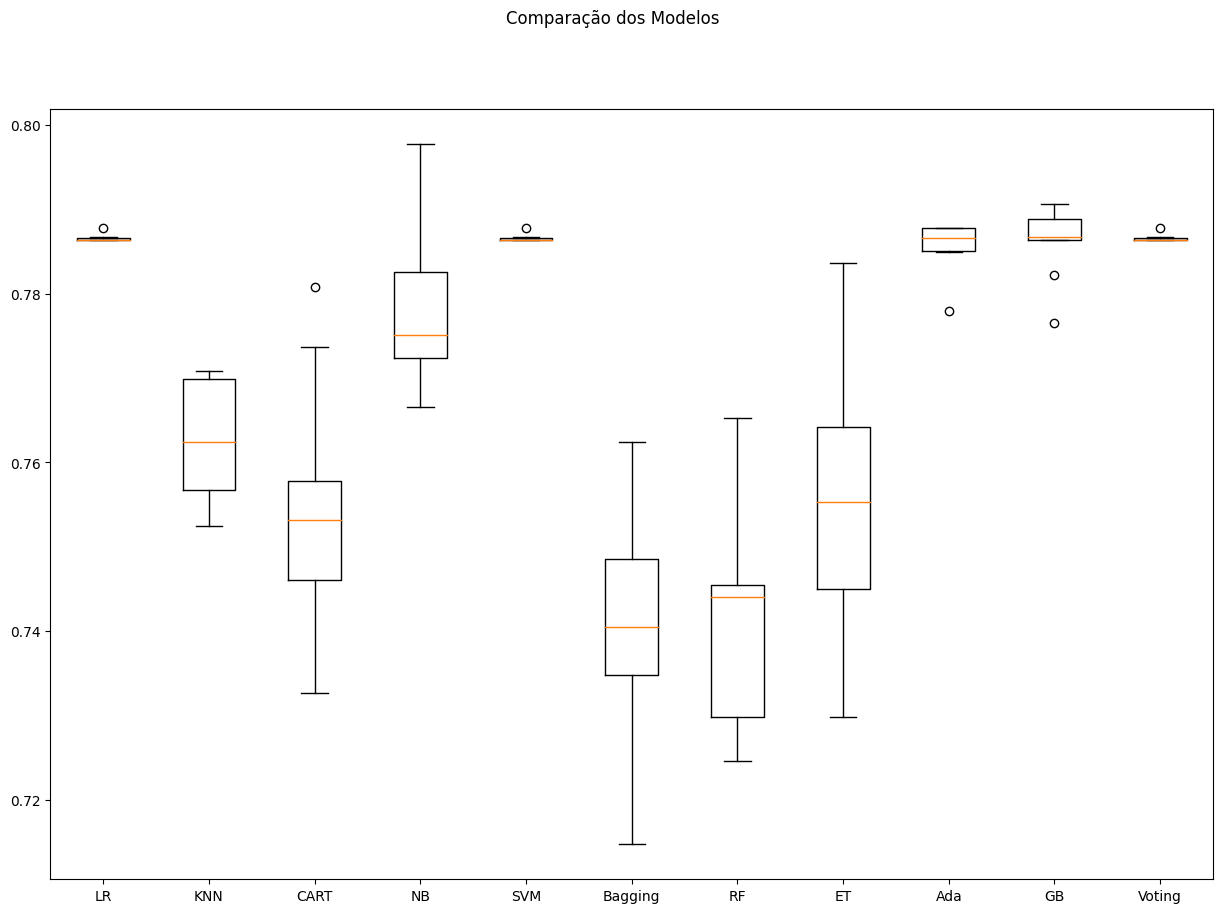

In [35]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

A partir da aplicação dos algoritimos, até o momento, pudemos observar que os que apresentaram o melhor desempenho foram a Regressão Logística (LR), a Máquina de Vetores de Suporte (SVM) e o método de Votação (Voting).

### 6.2 Criação e avaliação de modelos: dados padronizados e normalizados

As duas principais técnicas para redimensionar dados numéricos antes da modelagem são a Normalização e a Padronização. A normalização dimensiona cada atributo separadamente entre 0 e 1, enquanto a padronização dimensiona cada atributo separadamente subtraindo a média e dividindo pelo desvio padrão, transformando sua distribuição em uma distribuição normal padrão com média 0 e desvio padrão 1.

Para auxiliar nessa tarefa e evitar a ocorrência de data leakage, a biblioteca scikit-learn nos fornece um recurso conhecido como pipeline para ajudar a automatizar os fluxos de trabalho de machine learning. De forma resumida, os pipelines permitem que uma sequência linear de operações de preparação de dados seja encadeada com o treinamento do modelo, permitindo que este seja avaliado em seguida. O objetivo é garantir que todas as etapas do pipeline sejam restritas ao conjunto de dados apropriado (como o conjunto de treino do holdout ou cada fold do procedimento de validação cruzada), permitindo obter uma estimativa justa do desempenho do modelo com dados não vistos.

É importante ressaltar que o pipeline de modelagem, incluindo a preparação de dados e o treinamento do modelo, deve ser executado apenas no conjunto de treinamento para evitar o vazamento de dados. Ao avaliar o desempenho do modelo, as etapas do pipeline de treinamento devem ser replicadas no conjunto de teste, utilizando os parâmetros obtidos no conjunto de treinamento. Isso garante uma estimativa justa do desempenho do modelo em dados não vistos.



LR-orig: 0.787 (0.000)
KNN-orig: 0.762 (0.007)
CART-orig: 0.754 (0.014)
NB-orig: 0.778 (0.009)
SVM-orig: 0.787 (0.000)
Bag-orig: 0.741 (0.014)
RF-orig: 0.742 (0.014)
ET-orig: 0.756 (0.015)
Ada-orig: 0.786 (0.003)
GB-orig: 0.786 (0.004)
Vot-orig: 0.787 (0.000)
LR-padr: 0.784 (0.002)
KNN-padr: 0.762 (0.007)
CART-padr: 0.754 (0.014)
NB-padr: 0.778 (0.009)
SVM-padr: 0.787 (0.000)
Bag-padr: 0.742 (0.013)
RF-padr: 0.741 (0.016)
ET-padr: 0.756 (0.014)
Ada-padr: 0.786 (0.003)
GB-padr: 0.786 (0.004)
Vot-padr: 0.786 (0.001)
LR-norm: 0.784 (0.002)
KNN-norm: 0.762 (0.007)
CART-norm: 0.754 (0.014)
NB-norm: 0.778 (0.009)
SVM-norm: 0.787 (0.000)
Bag-norm: 0.742 (0.014)
RF-norm: 0.742 (0.015)
ET-norm: 0.756 (0.015)
Ada-norm: 0.786 (0.003)
GB-norm: 0.786 (0.004)
Vot-norm: 0.786 (0.001)


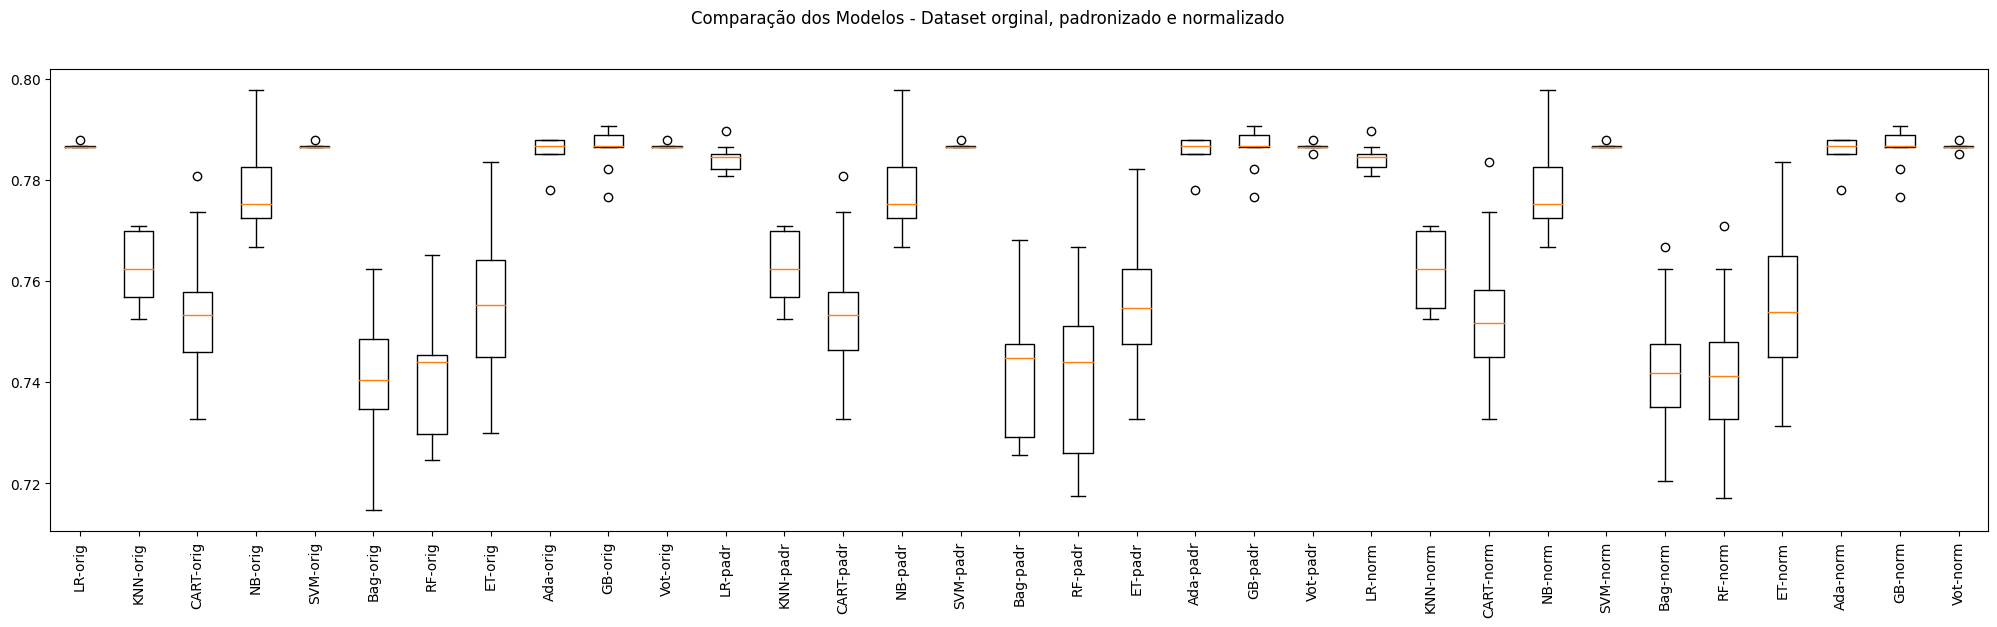

In [36]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Não foram identificadas variações significativas nos resultados Normalizados ou Padronizados dos dados.

### 6.3 Otimização dos hiperparâmetros

Após uma primeira avaliação, os modelos treinados, utilizando diferentes algoritmos de Machine Learning para tratar um determinado problema e analisar os resultados obtidos, faz-se necessario realizar o tuning (ajuste) dos melhores algoritmos utilizados até então. Tendo como objetivo, construir e buscas o melhor modelo possível para o problema apresentado.

O tuning envolve a otimização dos hiperparâmetros do modelo, que são parâmetros definidos antes do treinamento e que afetam o desempenho e comportamento do modelo. Ao ajustar esses hiperparâmetros, podemos melhorar a precisão, a eficiência e a capacidade de generalização do modelo.

Existem diferentes técnicas para realizar o tuning dos hiperparâmetros, como a busca em grid (grid search), em que são testadas várias combinações de valores para os hiperparâmetros, e a busca aleatória (random search), em que os valores dos hiperparâmetros são selecionados aleatoriamente dentro de um intervalo especificado.

O tuning dos modelos permite explorar e otimizar ainda mais o desempenho dos algoritmos de machine learning, ajustando-os de acordo com as características e peculiaridades dos dados e do problema em questão. Dessa forma, buscamos construir o melhor modelo possível, capaz de fornecer resultados mais precisos e confiáveis.

In [37]:
# Tuning do LR  (Logistic Regression)

# Estimador (Logistic Regression) e os hiperparâmetros a serem ajustados:
estimator = LogisticRegression(max_iter=200)
parameters = {'C': [1.0, 10.0], 'penalty': ['l1', 'l2']}

# 'C' controla a força da regularização e 'penalty' indica o tipo de regularização a ser aplicada
#  ('l1' para L1 regularization e 'l2' para L2 regularization).

# Busca em grade com validação cruzada:
grid_search = GridSearchCV(estimator, parameters, cv=5)
grid_search.fit(x, y)

# Onde:
# x são os atributos/features do conjunto de dados.
# y são os rótulos/targets correspondentes aos atributos.

# Melhores parâmetros encontrados:
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

# Melhor modelo treinado:
best_model = grid_search.best_estimator_


Melhores parâmetros encontrados: {'C': 1.0, 'penalty': 'l2'}


A busca em grade permite explorar combinações diferentes de hiperparâmetros e encotrar os melhores valores para otimizar o desempenho do Regressa Logística (LR).

### Finalização do Modelo

In [38]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = best_model
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.7851893725268513


Por meio do conjunto de teste, verificamos que alcançamos acurácia de 78,52% em dados não vistos. Ou seja, sem grande varição em relação a avaliação anterio da regressçao logística.

Vamos agora preparar o modelo para utilização em produção. Para isso, vamos treiná-lo com todo o dataset, e não apenas o conjunto de treino.

In [39]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(x) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(x) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)